In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


In [2]:
model=pd.read_excel("NASH-Model-modified 23dec23.xlsx")

In [3]:
model

,SL No,EARLY NASH,NASH AT RISK,ADV FIBR,APRI,FIB4,fibrosis cat,Fibrosis score,steatosis cat,Steatosis score,...,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH,Target
0,2,2,1,2,0.556818,1.703839,2,2,2,3,...,22.20,0.76,5.5,186.0,128.0,36.1,127.3,17.7,1.53,2.0
1,3,2,1,2,0.913174,0.855520,2,2,2,2,...,28.00,0.71,6.2,211.0,200.0,33.4,155.8,1.3,NaN,2.0
2,7,2,1,2,0.868852,2.278979,2,2,2,2,...,25.00,0.49,6.8,196.0,254.0,19.6,114.1,1.5,3.50,2.0
3,8,1,2,2,0.978723,1.442698,1,1,2,3,...,16.00,0.64,5.8,162.0,87.0,36.2,101.1,4,NaN,1.0
4,10,1,2,2,0.466667,0.825526,1,0,1,1,...,22.00,0.70,6.4,165.0,160.0,26.1,107.9,NaN,3.47,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1744,0,0,0,NaN,NaN,0,0,0,0,...,29.70,0.78,4.1,136.0,107.0,32.2,80.6,NaN,NaN,0.0
1317,1745,0,0,0,NaN,NaN,0,0,0,0,...,31.30,0.83,7.9,166.0,122.0,32.1,114.3,NaN,NaN,0.0
1318,1746,0,0,0,NaN,NaN,0,0,0,0,...,16.90,0.69,3.8,94.0,50.0,35.8,59.1,NaN,NaN,0.0
1319,1747,0,0,0,NaN,NaN,0,0,0,0,...,23.60,0.69,6.0,238.0,61.0,82.3,148.0,NaN,NaN,0.0


In [4]:
model.isnull().sum()

SL No                              0
EARLY NASH                         0
NASH AT RISK                       0
ADV FIBR                           0
APRI                             484
FIB4                             484
fibrosis cat                       0
Fibrosis score                     0
steatosis cat                      0
Steatosis score                    0
balloning cat                      0
Ballooning degeneration score      0
lob infl cat                       1
Lob. Inflm score                   1
Age                                0
Gender                             0
Wt                               109
BMI                              466
DM                               456
DYSLIPIDE                        466
WEIGHT                           466
HB                                27
TLC                               29
PLT                               23
NLR                              488
Albumin                            2
Serum Alkaline Phosphatase         3
S

In [5]:
columns_to_fill = [ 'Wt', 'BMI', 'DM', 'DYSLIPIDE','WEIGHT','HB','TLC','PLT','NLR','Albumin','Serum Alkaline Phosphatase','Serum Bilirubin Direct','Serum Bilirubin Indirect','Serum HDL  Cholesterol','Serum LDL Cholesterol','TNF Alpha','TSH','Lob. Inflm score','Serum ALT /SGPT','Serum AST/SGOT','lob infl cat','Serum GGT','Serum Urea','Serum Creatinine','Serum Uric Acid','Serum Cholesterol','Serum Triglycerides','Serum Bilirubin Total']
for columns in columns_to_fill:
    model[columns]=pd.to_numeric(model[columns],errors='coerce')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer(max_iter=10,random_state=42)
imputer.fit(model)
impute_trans=imputer.transform(model)
model=pd.DataFrame(impute_trans,columns=model.columns)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [6]:
model.isnull().sum()

SL No                            0
EARLY NASH                       0
NASH AT RISK                     0
ADV FIBR                         0
APRI                             0
FIB4                             0
fibrosis cat                     0
Fibrosis score                   0
steatosis cat                    0
Steatosis score                  0
balloning cat                    0
Ballooning degeneration score    0
lob infl cat                     0
Lob. Inflm score                 0
Age                              0
Gender                           0
Wt                               0
BMI                              0
DM                               0
DYSLIPIDE                        0
WEIGHT                           0
HB                               0
TLC                              0
PLT                              0
NLR                              0
Albumin                          0
Serum Alkaline Phosphatase       0
Serum ALT /SGPT                  0
Serum AST/SGOT      

In [7]:
model.keys()

Index(['SL No', 'EARLY NASH', 'NASH AT RISK', 'ADV FIBR', 'APRI', 'FIB4',
       'fibrosis cat', 'Fibrosis score', 'steatosis cat', 'Steatosis score',
       'balloning cat', 'Ballooning degeneration score', 'lob infl cat',
       'Lob. Inflm score', 'Age', 'Gender', 'Wt', 'BMI', 'DM', 'DYSLIPIDE',
       'WEIGHT', 'HB', 'TLC', 'PLT', 'NLR', 'Albumin',
       'Serum Alkaline Phosphatase', 'Serum ALT /SGPT', 'Serum AST/SGOT',
       'Serum Bilirubin Direct', 'Serum Bilirubin Indirect',
       'Serum Bilirubin Total', 'Serum GGT', 'Serum Urea', 'Serum Creatinine',
       'Serum Uric Acid', 'Serum Cholesterol', 'Serum Triglycerides',
       'Serum HDL  Cholesterol', 'Serum LDL Cholesterol', 'TNF Alpha', 'TSH',
       'Target'],
      dtype='object')

In [8]:
model=model.drop(['SL No','Fibrosis score','Steatosis score','Ballooning degeneration score','Lob. Inflm score','fibrosis cat','steatosis cat','balloning cat','lob infl cat','EARLY NASH','NASH AT RISK','ADV FIBR','APRI','FIB4'],axis=1)

In [9]:
model

,Age,Gender,Wt,BMI,DM,DYSLIPIDE,WEIGHT,HB,TLC,PLT,...,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH,Target
0,53.0,2.0,38.800000,14.251607,2.000000,1.000000,1.000000,13.7,9.60,220.0,...,22.20,0.76,5.5,186.0,128.0,36.1,127.3,17.700000,1.530000,2.0
1,24.0,1.0,77.400000,14.351576,2.000000,1.000000,1.000000,14.2,8.10,167.0,...,28.00,0.71,6.2,211.0,200.0,33.4,155.8,1.300000,1.048946,2.0
2,45.0,2.0,82.000000,15.023136,2.000000,1.000000,1.000000,9.8,11.10,305.0,...,25.00,0.49,6.8,196.0,254.0,19.6,114.1,1.500000,3.500000,2.0
3,39.0,2.0,96.200000,15.118367,2.000000,1.000000,1.000000,13.1,11.00,235.0,...,16.00,0.64,5.8,162.0,87.0,36.2,101.1,4.000000,1.903185,1.0
4,29.0,1.0,68.000000,15.432619,2.000000,1.000000,1.000000,15.4,7.10,150.0,...,22.00,0.70,6.4,165.0,160.0,26.1,107.9,10.780740,3.470000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,18.0,2.0,54.600000,38.368282,1.830281,1.237989,2.691854,7.8,9.20,390.0,...,29.70,0.78,4.1,136.0,107.0,32.2,80.6,15.397150,3.093272,0.0
1317,18.0,1.0,81.740672,39.032115,1.876649,1.062012,2.667278,15.2,5.80,214.0,...,31.30,0.83,7.9,166.0,122.0,32.1,114.3,15.652849,1.302894,0.0
1318,18.0,2.0,82.000000,39.136936,1.909325,1.402641,2.651498,11.7,7.55,312.0,...,16.90,0.69,3.8,94.0,50.0,35.8,59.1,15.631378,2.506558,0.0
1319,18.0,2.0,75.240559,39.066292,1.891020,2.846721,2.702594,12.8,9.50,451.0,...,23.60,0.69,6.0,238.0,61.0,82.3,148.0,15.489393,5.416321,0.0


In [10]:
model['Target'] = model['Target'].astype(int)

In [11]:
y=model[['Target']]

In [12]:
y

,Target
0,2
1,2
2,2
3,1
4,1
...,...
1316,0
1317,0
1318,0
1319,0


In [13]:
model=model.drop(['Target'],axis=1)


In [14]:
model

,Age,Gender,Wt,BMI,DM,DYSLIPIDE,WEIGHT,HB,TLC,PLT,...,Serum GGT,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH
0,53.0,2.0,38.800000,14.251607,2.000000,1.000000,1.000000,13.7,9.60,220.0,...,55.0,22.20,0.76,5.5,186.0,128.0,36.1,127.3,17.700000,1.530000
1,24.0,1.0,77.400000,14.351576,2.000000,1.000000,1.000000,14.2,8.10,167.0,...,41.0,28.00,0.71,6.2,211.0,200.0,33.4,155.8,1.300000,1.048946
2,45.0,2.0,82.000000,15.023136,2.000000,1.000000,1.000000,9.8,11.10,305.0,...,30.0,25.00,0.49,6.8,196.0,254.0,19.6,114.1,1.500000,3.500000
3,39.0,2.0,96.200000,15.118367,2.000000,1.000000,1.000000,13.1,11.00,235.0,...,54.0,16.00,0.64,5.8,162.0,87.0,36.2,101.1,4.000000,1.903185
4,29.0,1.0,68.000000,15.432619,2.000000,1.000000,1.000000,15.4,7.10,150.0,...,12.0,22.00,0.70,6.4,165.0,160.0,26.1,107.9,10.780740,3.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,18.0,2.0,54.600000,38.368282,1.830281,1.237989,2.691854,7.8,9.20,390.0,...,10.0,29.70,0.78,4.1,136.0,107.0,32.2,80.6,15.397150,3.093272
1317,18.0,1.0,81.740672,39.032115,1.876649,1.062012,2.667278,15.2,5.80,214.0,...,28.0,31.30,0.83,7.9,166.0,122.0,32.1,114.3,15.652849,1.302894
1318,18.0,2.0,82.000000,39.136936,1.909325,1.402641,2.651498,11.7,7.55,312.0,...,16.0,16.90,0.69,3.8,94.0,50.0,35.8,59.1,15.631378,2.506558
1319,18.0,2.0,75.240559,39.066292,1.891020,2.846721,2.702594,12.8,9.50,451.0,...,45.0,23.60,0.69,6.0,238.0,61.0,82.3,148.0,15.489393,5.416321


In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(model, y,test_size=0.2)

In [77]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Assuming Xtrain contains your training features and ytrain_discrete contains discrete class labels
new0=HistGradientBoostingClassifier()
new0.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier()

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'l2_regularization': uniform(loc=0.0, scale=1.0),
}
random_search = RandomizedSearchCV(new0, param_distributions, random_state=42)
random_search.fit(Xtrain, ytrain)





C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(),
                   param_distributions={'l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11F9E0490>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11F964410>,
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [79]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

HistGradientBoostingClassifier(l2_regularization=0.7219987722668247,
                               learning_rate=0.19771054180315006, max_depth=5,
                               min_samples_leaf=1)

In [88]:
new0=HistGradientBoostingClassifier(l2_regularization=0.7219987722668247,
                               learning_rate=0.19771054180315006, max_depth=1,
                               min_samples_leaf=1)
new0.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(l2_regularization=0.7219987722668247,
                               learning_rate=0.19771054180315006, max_depth=1,
                               min_samples_leaf=1)

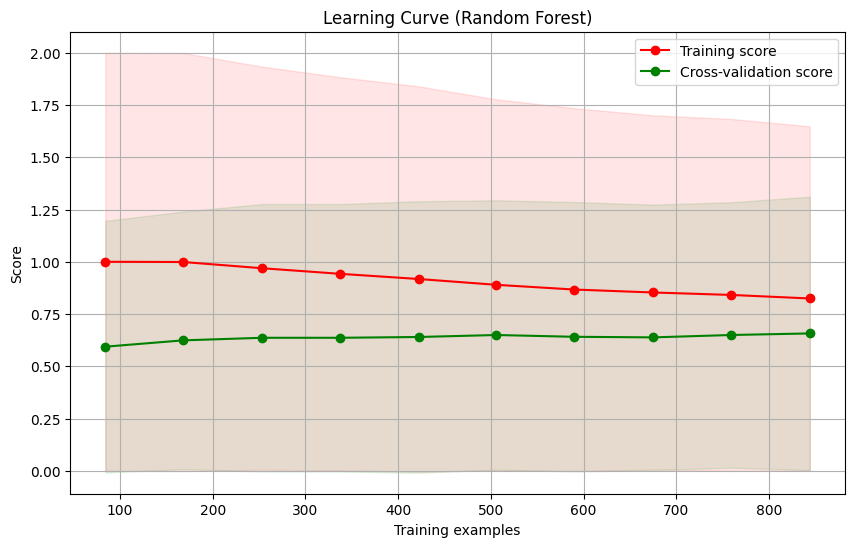

In [89]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(new0,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [90]:
accuracy = round(new0.score(Xtest, ytest)*100,2)
print(round(accuracy, 2), '%')

69.06 %


In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
# Assuming Xtrain contains your training features and ytrain_discrete contains discrete class labels
new1 =OneVsRestClassifier(HistGradientBoostingClassifier())
new1.fit(Xtrain, ytrain)



OneVsRestClassifier(estimator=HistGradientBoostingClassifier())

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__max_iter': [100, 200, 700],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__l2_regularization': uniform(loc=0.0, scale=1.0)
}
random_search = RandomizedSearchCV(new1, param_distributions, random_state=42)
random_search.fit(Xtrain, ytrain)


RandomizedSearchCV(estimator=OneVsRestClassifier(estimator=HistGradientBoostingClassifier()),
                   param_distributions={'estimator__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDA1978190>,
                                        'estimator__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDFF6B8150>,
                                        'estimator__max_depth': [3, 5, 7],
                                        'estimator__max_iter': [100, 200, 700],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4]},
                   random_state=42)

In [28]:
# Get the best estimator and best parameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

OneVsRestClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.3745401188473625,
                                                             learning_rate=0.20014286128198325,
                                                             max_depth=7,
                                                             min_samples_leaf=1))

In [29]:
new1=OneVsRestClassifier(HistGradientBoostingClassifier(l2_regularization=0.3745401188473625,
                               learning_rate=0.20014286128198325, max_depth=7,
                               min_samples_leaf=1))
new1.fit(Xtrain, ytrain)

OneVsRestClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.3745401188473625,
                                                             learning_rate=0.20014286128198325,
                                                             max_depth=7,
                                                             min_samples_leaf=1))

In [30]:
accuracy1 = round(new1.score(Xtest, ytest)*100,2)
print(round(accuracy1, 2), '%')

67.55 %


In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsOneClassifier
new2 =OneVsOneClassifier(HistGradientBoostingClassifier())
new2.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=HistGradientBoostingClassifier())

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__max_iter': [100, 200, 700],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__l2_regularization': uniform(loc=0.0, scale=1.0)
}
random_search = RandomizedSearchCV(new2, param_distributions, random_state=42)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

RandomizedSearchCV(estimator=OneVsOneClassifier(estimator=HistGradientBoostingClassifier()),
                   param_distributions={'estimator__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDA1AA8190>,
                                        'estimator__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDA1874610>,
                                        'estimator__max_depth': [3, 5, 7],
                                        'estimator__max_iter': [100, 200, 700],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4]},
                   random_state=42)

In [29]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

OneVsOneClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.6011150117432088,
                                                            learning_rate=0.1516145155592091,
                                                            max_depth=5,
                                                            min_samples_leaf=2))

In [31]:
new2=OneVsOneClassifier(HistGradientBoostingClassifier(l2_regularization=0.6011150117432088,
                               learning_rate=0.1516145155592091, max_depth=5,
                               min_samples_leaf=2))
new2.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.6011150117432088,
                                                            learning_rate=0.1516145155592091,
                                                            max_depth=5,
                                                            min_samples_leaf=2))

In [32]:
accuracy2 = round(new2.score(Xtest, ytest)*100,2)
print(round(accuracy2, 2), '%')

67.55 %


In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OutputCodeClassifier
new3 =OutputCodeClassifier(HistGradientBoostingClassifier())
new3.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OutputCodeClassifier(estimator=HistGradientBoostingClassifier())

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__max_iter': [100, 200, 700],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__l2_regularization': uniform(loc=0.0, scale=1.0)
}
random_search = RandomizedSearchCV(new3, param_distributions, random_state=42)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

RandomizedSearchCV(estimator=OutputCodeClassifier(estimator=HistGradientBoostingClassifier()),
                   param_distributions={'estimator__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C0F43D0>,
                                        'estimator__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055AFF4F10>,
                                        'estimator__max_depth': [3, 5, 7],
                                        'estimator__max_iter': [100, 200, 700],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4]},
                   random_state=42)

In [35]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

OutputCodeClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.7851759613930136,
                                                              learning_rate=0.04993475643167195,
                                                              max_depth=7,
                                                              min_samples_leaf=4))

In [36]:
new3=OutputCodeClassifier(HistGradientBoostingClassifier(l2_regularization=0.7851759613930136,
                               learning_rate=0.04993475643167195, max_depth=7,
                               min_samples_leaf=4))
new3.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OutputCodeClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.7851759613930136,
                                                              learning_rate=0.04993475643167195,
                                                              max_depth=7,
                                                              min_samples_leaf=4))

In [37]:
accuracy3 = round(new3.score(Xtest, ytest)*100,2)
print(round(accuracy3, 2), '%')

49.06 %


In [71]:
from sklearn.neural_network import MLPClassifier
mew0 = MLPClassifier(hidden_layer_sizes=(1000,100),max_iter=100,random_state=42)
mew0.fit(Xtrain,ytrain)


C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=100, random_state=42)

In [72]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'learning_rate_init': uniform(loc=0.001, scale=0.1),
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'alpha': uniform(loc=0.0001, scale=0.001),
    'beta_1': uniform(loc=0.7, scale=0.2),
    'beta_2': uniform(loc=0.8, scale=0.2)
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(mew0, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilay

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=MLPClassifier(hidden_layer_sizes=(1000, 100),
                                           max_iter=100, random_state=42),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11D963110>,
                                        'beta_1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11D94F2D0>,
                                        'beta_2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11D94F8D0>,
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (150,)],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11F569210>},
                   random_state=42)

In [73]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

MLPClassifier(alpha=0.0008080725777960456, beta_1=0.7041168988591604,
              beta_2=0.9939819704323989,
              learning_rate_init=0.022233911067827617, max_iter=100,
              random_state=42)

In [74]:
mew0=MLPClassifier(alpha=0.0008080725777960456, beta_1=0.7041168988591604,
              beta_2=0.9939819704323989,
              learning_rate_init=0.022233911067827617, max_iter=100,
              random_state=42)
mew0.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.0008080725777960456, beta_1=0.7041168988591604,
              beta_2=0.9939819704323989,
              learning_rate_init=0.022233911067827617, max_iter=100,
              random_state=42)

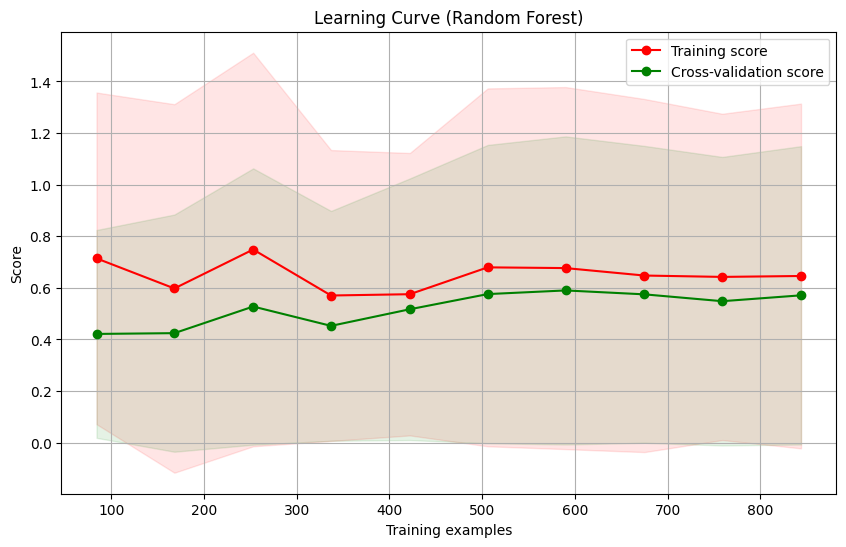

In [75]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(mew0,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()


In [76]:
mlaccuracy4= round(mew0.score(Xtest, ytest)*100,2)
print(round(mlaccuracy4, 2), '%')

46.04 %


In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
mew1 = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(1000,100),max_iter=100,random_state=42))
mew1.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


OneVsRestClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000, 100),
                                            max_iter=100, random_state=42))

In [44]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate_init': uniform(loc=0.001, scale=0.1),
    'estimator__hidden_layer_sizes': [(50,), (100,), (150,)],
    'estimator__alpha': uniform(loc=0.0001, scale=0.001),
    'estimator__beta_1': uniform(loc=0.7, scale=0.2),
    'estimator__beta_2': uniform(loc=0.8, scale=0.2)
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(mew1, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=OneVsRestClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000,
                                                                                             100),
                                                                         max_iter=100,
                                                                         random_state=42)),
                   param_distributions={'estimator__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C2F2C90>,
                                        'estimator__beta_1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C33F890>,
                                        'estimator__beta_2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C33FED0>,
                                        'estimator__hidden_layer_sizes': [(50,),
                                                                          (100,),
                                                                          (150,)],
                                        'estimator__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C239610>},
                   random_state=42)

In [45]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

OneVsRestClassifier(estimator=MLPClassifier(alpha=0.000709996657782621,
                                            beta_1=0.8666389823472328,
                                            beta_2=0.8346729307015545,
                                            hidden_layer_sizes=(50,),
                                            learning_rate_init=0.026877998160001693,
                                            max_iter=100, random_state=42))

In [47]:
mew1=OneVsRestClassifier(MLPClassifier(alpha=0.000709996657782621, beta_1=0.8666389823472328,
              beta_2=0.8346729307015545, hidden_layer_sizes=(50,),
              learning_rate_init=0.026877998160001693, max_iter=100,
              random_state=42)
)
mew1.fit(Xtrain,ytrain)

OneVsRestClassifier(estimator=MLPClassifier(alpha=0.000709996657782621,
                                            beta_1=0.8666389823472328,
                                            beta_2=0.8346729307015545,
                                            hidden_layer_sizes=(50,),
                                            learning_rate_init=0.026877998160001693,
                                            max_iter=100, random_state=42))

In [48]:
mlaccuracy5 = round(mew1.score(Xtest, ytest)*100,2)
print(round(mlaccuracy5, 2), '%')

56.6 %


In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier
mew2 = OneVsOneClassifier(MLPClassifier(hidden_layer_sizes=(1000,100),max_iter=100,random_state=42))
mew2.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conver

OneVsOneClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000, 100),
                                           max_iter=100, random_state=42))

In [50]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate_init': uniform(loc=0.001, scale=0.1),
    'estimator__hidden_layer_sizes': [(50,), (100,), (150,)],
    'estimator__alpha': uniform(loc=0.0001, scale=0.001),
    'estimator__beta_1': uniform(loc=0.7, scale=0.2),
    'estimator__beta_2': uniform(loc=0.8, scale=0.2)
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(mew2, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=OneVsOneClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000,
                                                                                            100),
                                                                        max_iter=100,
                                                                        random_state=42)),
                   param_distributions={'estimator__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055B045110>,
                                        'estimator__beta_1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C2B4190>,
                                        'estimator__beta_2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C2B5210>,
                                        'estimator__hidden_layer_sizes': [(50,),
                                                                          (100,),
                                                                          (150,)],
                                        'estimator__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002055C1D9F10>},
                   random_state=42)

In [51]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

OneVsOneClassifier(estimator=MLPClassifier(alpha=0.0004745401188473625,
                                           beta_1=0.8901428612819832,
                                           beta_2=0.9463987883622811,
                                           hidden_layer_sizes=(50,),
                                           learning_rate_init=0.0606850157946487,
                                           max_iter=100, random_state=42))

In [52]:
mew2=OneVsOneClassifier(MLPClassifier(alpha=0.0004745401188473625, beta_1=0.8901428612819832,
              beta_2=0.9463987883622811, hidden_layer_sizes=(50,),
              learning_rate_init=0.0606850157946487, max_iter=100,
              random_state=42))
mew2.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=MLPClassifier(alpha=0.0004745401188473625,
                                           beta_1=0.8901428612819832,
                                           beta_2=0.9463987883622811,
                                           hidden_layer_sizes=(50,),
                                           learning_rate_init=0.0606850157946487,
                                           max_iter=100, random_state=42))

In [53]:
mlaccuracy6 = round(mew2.score(Xtest, ytest)*100,2)
print(round(mlaccuracy6, 2), '%')

53.58 %


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OutputCodeClassifier
mew3 = OutputCodeClassifier(MLPClassifier(hidden_layer_sizes=(1000,100),max_iter=100,random_state=42))
mew3.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


OutputCodeClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000, 100),
                                             max_iter=100, random_state=42))

In [55]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate_init': uniform(loc=0.001, scale=0.1),
    'estimator__hidden_layer_sizes': [(50,), (100,), (150,)],
    'estimator__alpha': uniform(loc=0.0001, scale=0.001),
    'estimator__beta_1': uniform(loc=0.7, scale=0.2),
    'estimator__beta_2': uniform(loc=0.8, scale=0.2)
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(mew3, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

OutputCodeClassifier(estimator=MLPClassifier(alpha=0.000709996657782621,
                                             beta_1=0.8666389823472328,
                                             beta_2=0.8346729307015545,
                                             hidden_layer_sizes=(50,),
                                             learning_rate_init=0.026877998160001693,
                                             max_iter=100, random_state=42))

In [56]:
mew3=OneVsOneClassifier(MLPClassifier(alpha=0.000709996657782621, beta_1=0.8666389823472328,
              beta_2=0.8346729307015545, hidden_layer_sizes=(50,),
              learning_rate_init=0.026877998160001693, max_iter=100,
              random_state=42))
mew3.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=MLPClassifier(alpha=0.000709996657782621,
                                           beta_1=0.8666389823472328,
                                           beta_2=0.8346729307015545,
                                           hidden_layer_sizes=(50,),
                                           learning_rate_init=0.026877998160001693,
                                           max_iter=100, random_state=42))

In [57]:
mlaccuracy7= round(mew3.score(Xtest, ytest)*100,2)
print(round(mlaccuracy7, 2), '%')

56.6 %


In [134]:
from sklearn.ensemble import RandomForestClassifier
oew0 = RandomForestClassifier(n_estimators=1, random_state=42,n_jobs=-1)
oew0.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1, n_jobs=-1, random_state=42)

In [135]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(oew0, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=13, n_estimators=393, n_jobs=-1,
                       random_state=42)

In [202]:
oew0=RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,
                       min_samples_split=13, n_estimators=393, n_jobs=-1,
                       random_state=42)
oew0.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,
                       min_samples_split=13, n_estimators=393, n_jobs=-1,
                       random_state=42)

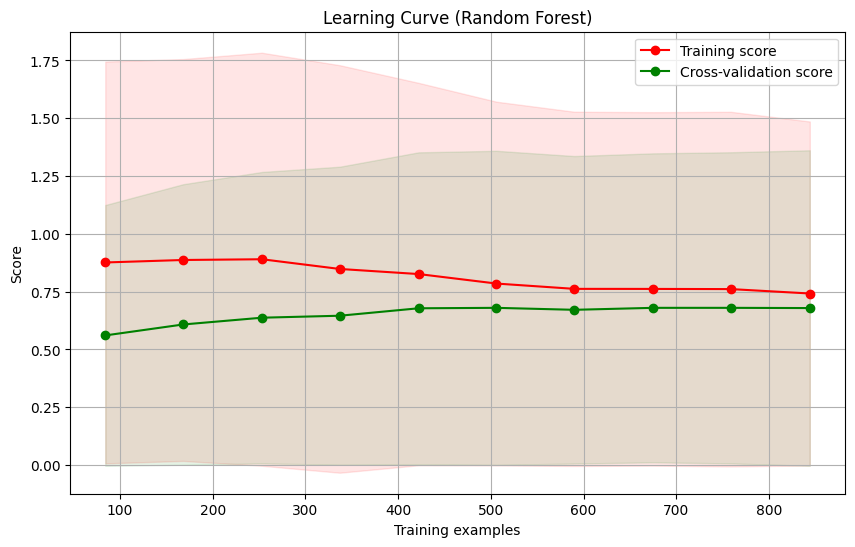

In [203]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(oew0,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()





In [204]:
mlaccuracy8 = round(oew0.score(Xtest, ytest)*100,2)
print(round(mlaccuracy8, 2), '%')

68.68 %


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
oew1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1))
oew1.fit(Xtrain,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                     random_state=42))

In [67]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint
param_distributions = {
    'estimator__n_estimators': randint(100, 500),
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 20),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(oew1, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\skle

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=50,
                                                     min_samples_leaf=15,
                                                     min_samples_split=13,
                                                     n_estimators=154,
                                                     n_jobs=-1,
                                                     random_state=42))

In [68]:
oew1=OneVsRestClassifier(RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=15,
                       min_samples_split=13, n_estimators=154, n_jobs=-1,
                       random_state=42))
oew1.fit(Xtrain,ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=50,
                                                     min_samples_leaf=15,
                                                     min_samples_split=13,
                                                     n_estimators=154,
                                                     n_jobs=-1,
                                                     random_state=42))

In [69]:
mlaccuracy9= round(oew1.score(Xtest, ytest)*100,2)
print(round(mlaccuracy9, 2), '%')

66.79 %


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
oew2 = OneVsOneClassifier(RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1))
oew2.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                    random_state=42))

In [71]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint
param_distributions = {
    'estimator__n_estimators': randint(100, 500),
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 20),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(oew2, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=40,
                                                    min_samples_leaf=15,
                                                    min_samples_split=8,
                                                    n_estimators=363, n_jobs=-1,
                                                    random_state=42))

In [72]:
oew2=OneVsOneClassifier(RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=15,
                       min_samples_split=8, n_estimators=363, n_jobs=-1,
                       random_state=42))
oew2.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=40,
                                                    min_samples_leaf=15,
                                                    min_samples_split=8,
                                                    n_estimators=363, n_jobs=-1,
                                                    random_state=42))

In [73]:
mlaccuracy10= round(oew2.score(Xtest, ytest)*100,2)
print(round(mlaccuracy10, 2), '%')

64.53 %


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import  OutputCodeClassifier
oew3 = OutputCodeClassifier(RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1))
oew3.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OutputCodeClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                      n_jobs=-1,
                                                      random_state=42))

In [75]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint
param_distributions = {
    'estimator__n_estimators': randint(100, 500),
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 20),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(oew3, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

OutputCodeClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                      max_features='log2',
                                                      min_samples_leaf=2,
                                                      min_samples_split=13,
                                                      n_estimators=393,
                                                      n_jobs=-1,
                                                      random_state=42))

In [76]:
oew3=OutputCodeClassifier(RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=13, n_estimators=393, n_jobs=-1,
                       random_state=42))
oew3.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OutputCodeClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                      max_features='log2',
                                                      min_samples_leaf=2,
                                                      min_samples_split=13,
                                                      n_estimators=393,
                                                      n_jobs=-1,
                                                      random_state=42))

In [77]:
mlaccuracy11= round(oew3.score(Xtest, ytest)*100,2)
print(round(mlaccuracy11, 2), '%')

66.42 %


In [25]:
from sklearn.linear_model import LinearRegression
lew0=LinearRegression()
lew0.fit(Xtrain, ytrain)

LinearRegression()

In [26]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint
param_distributions = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(lew0, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearRegression(positive=True)

In [27]:
lew0=LinearRegression(positive=True)
lew0.fit(Xtrain, ytrain)

LinearRegression(positive=True)

In [28]:
mlaccuracy12= round(lew0.score(Xtest, ytest)*100,2)
print(round(mlaccuracy12, 2), '%')

8.72 %


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import  OneVsRestClassifier
lew1= OneVsRestClassifier(LinearRegression())
lew1.fit(Xtrain, ytrain)

OneVsRestClassifier(estimator=LinearRegression())

In [98]:
mlaccuracy13= round(lew1.score(Xtest, ytest)*100,2)
print(round(mlaccuracy13, 2), '%')

61.89 %


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import  OneVsOneClassifier
lew2= OneVsRestClassifier(LinearRegression())
lew2.fit(Xtrain, ytrain)

OneVsRestClassifier(estimator=LinearRegression())

In [100]:
mlaccuracy14= round(lew2.score(Xtest, ytest)*100,2)
print(round(mlaccuracy14, 2), '%')

61.89 %


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
bew0= GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=42)
bew0.fit(Xtrain, ytrain)


C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=42)

In [105]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': uniform(loc=0.0, scale=1.0),  # Regularization
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(bew0, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        max_depth=1,
                                                        n_estimators=10,
                                                        random_state=42),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11D36FED0>,
                                        'max_depth': [3, 5, 7],
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F11D33DB50>,
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [106]:
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

GradientBoostingClassifier(learning_rate=0.03789877213040837, max_depth=7,
                           min_impurity_decrease=0.45606998421703593,
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42)

In [208]:
bew0=GradientBoostingClassifier(learning_rate=0.03789877213040837, max_depth=10,
                           min_impurity_decrease=0.45606998421703593,
                           min_samples_leaf=4, n_estimators=393,
                           random_state=42)

bew0.fit(Xtrain,ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.03789877213040837, max_depth=10,
                           min_impurity_decrease=0.45606998421703593,
                           min_samples_leaf=4, n_estimators=393,
                           random_state=42)

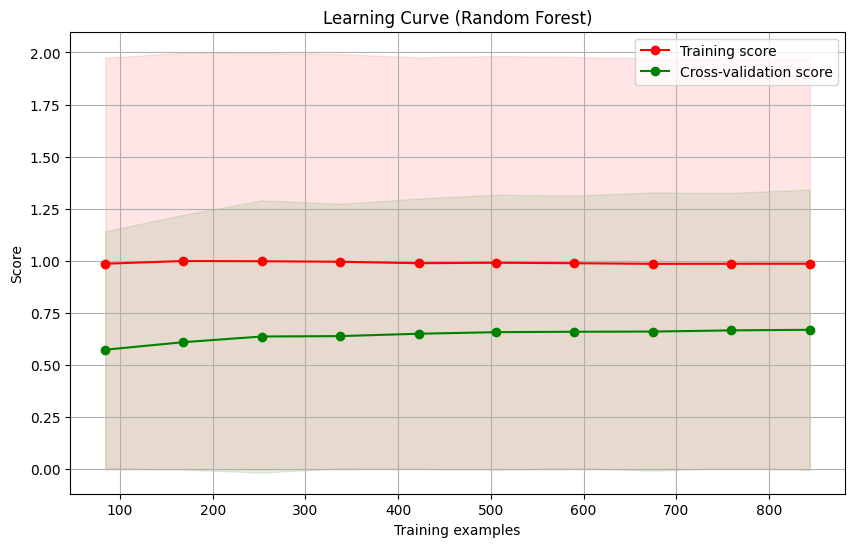

In [209]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(bew0,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [210]:
mlaccuracy15= round(bew0.score(Xtest, ytest)*100,2)
print(round(mlaccuracy15, 2), '%')

65.66 %


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
bew1= OneVsRestClassifier(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=42))
bew1.fit(Xtrain, ytrain)

OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         n_estimators=10,
                                                         random_state=42))

In [17]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__min_impurity_decrease': uniform(loc=0.0, scale=1.0),  # Regularization
}
cv= KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(bew1, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator


OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=0.0412037280884873,
                                                         max_depth=7,
                                                         min_impurity_decrease=0.09997491581800289,
                                                         min_samples_leaf=4,
                                                         random_state=42))

In [19]:
bew1=OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.0412037280884873, max_depth=7,
                           min_impurity_decrease=0.09997491581800289,
                           min_samples_leaf=4, random_state=42))
bew1.fit(Xtrain,ytrain)

OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=0.0412037280884873,
                                                         max_depth=7,
                                                         min_impurity_decrease=0.09997491581800289,
                                                         min_samples_leaf=4,
                                                         random_state=42))

In [20]:
mlaccuracy16= round(bew1.score(Xtest, ytest)*100,2)
print(round(mlaccuracy16, 2), '%')

67.17 %


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsOneClassifier
bew2=  OneVsOneClassifier(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=42))
bew2.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        max_depth=1,
                                                        n_estimators=10,
                                                        random_state=42))

In [17]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__min_impurity_decrease': uniform(loc=0.0, scale=1.0),  # Regularization
}
cv= KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(bew2, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

OneVsOneClassifier(estimator=GradientBoostingClassifier(learning_rate=0.13022300234864176,
                                                        max_depth=7,
                                                        min_impurity_decrease=0.020584494295802447,
                                                        min_samples_leaf=2,
                                                        n_estimators=200,
                                                        random_state=42))

In [18]:
bew2=OneVsOneClassifier(GradientBoostingClassifier(learning_rate=0.13022300234864176, max_depth=7,
                           min_impurity_decrease=0.020584494295802447,
                           min_samples_leaf=2, n_estimators=200,
                           random_state=42))
bew2.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=GradientBoostingClassifier(learning_rate=0.13022300234864176,
                                                        max_depth=7,
                                                        min_impurity_decrease=0.020584494295802447,
                                                        min_samples_leaf=2,
                                                        n_estimators=200,
                                                        random_state=42))

In [19]:
mlaccuracy17= round(bew2.score(Xtest, ytest)*100,2)
print(round(mlaccuracy17, 2), '%')

63.4 %


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OutputCodeClassifier
bew3=  OutputCodeClassifier(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=42))
bew3.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OutputCodeClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                          max_depth=1,
                                                          n_estimators=10,
                                                          random_state=42))

In [21]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform
param_distributions = {
    'estimator__learning_rate': uniform(loc=0.01, scale=0.2),
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__min_impurity_decrease': uniform(loc=0.0, scale=1.0),  # Regularization
}
cv= KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(bew3, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

OutputCodeClassifier(estimator=GradientBoostingClassifier(learning_rate=0.0412037280884873,
                                                          max_depth=7,
                                                          min_impurity_decrease=0.09997491581800289,
                                                          min_samples_leaf=4,
                                                          random_state=42))

In [76]:
mlaccuracy18= round(bew3.score(Xtest, ytest)*100,2)
print(round(mlaccuracy18, 2), '%')

62.26 %


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
case1 = LogisticRegression(random_state=42)
case1.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import uniform

param_distributions = {
    'C': uniform(loc=0, scale=4),  # Regularization strength
    'penalty': ['l1', 'l2'],       # Penalty type
    'solver': ['liblinear', 'saga'] # Solver algorithm
}
cv= KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(case1, param_distributions, random_state=42,cv=cv)
random_search.fit(Xtrain, ytrain)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_params
best_estimator

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

LogisticRegression(C=2.9279757672456204, penalty='l1', random_state=42,
                   solver='liblinear')

In [36]:
case1=LogisticRegression(C=2.9279757672456204, penalty='l1', random_state=42,
                   solver='liblinear')
case1.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=2.9279757672456204, penalty='l1', random_state=42,
                   solver='liblinear')

In [37]:
mlaccuracy19= round(case1.score(Xtest, ytest)*100,2)
print(round(mlaccuracy19, 2), '%')

63.77 %


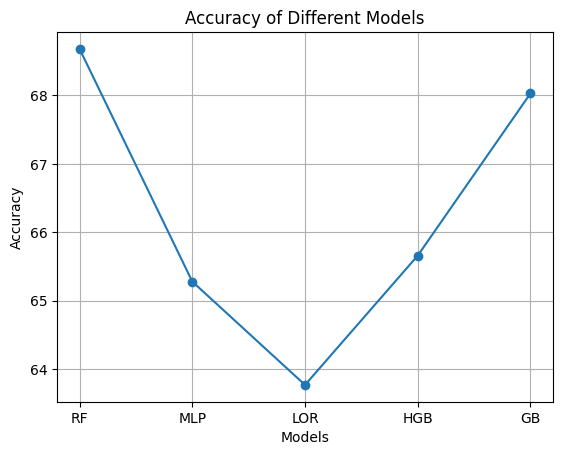

In [211]:
import matplotlib.pyplot as plt
models = ['RF','MLP','LOR','HGB','GB']
accuracy_values = [68.68,65.28 , 63.77   ,65.66,68.03 ]

plt.plot(models, accuracy_values, marker='o', linestyle='-')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

plt.grid(True)
        # plt.legend(['Accuracy'])
plt.show()